In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline 
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

In [2]:
diseases = pd.read_csv('./HeartDiseaseData.csv')

In [3]:
diseases.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [4]:
diseases.shape

(457, 14)

In [5]:
diseases.describe()

,Unnamed: 0,ID,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,457.000000,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,229.000000,229.000000,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,132.068795,132.068795,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,1.000000,1.000000,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,115.000000,115.000000,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,229.000000,229.000000,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,343.000000,343.000000,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,457.000000,457.000000,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [6]:
diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 14 columns):
Unnamed: 0    457 non-null int64
ID            457 non-null int64
Age           457 non-null int64
Sex           457 non-null object
cp            457 non-null object
trestbps      424 non-null float64
chol          431 non-null float64
fbs           403 non-null object
restecg       455 non-null object
thalach       424 non-null float64
exang         424 non-null object
oldpeak       421 non-null float64
num           457 non-null int64
Place         457 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 50.1+ KB


In [7]:
diseases = diseases.drop(['Unnamed: 0', 'ID'], axis=1)

In [8]:
diseases.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [9]:
diseases.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
Place        0
dtype: int64

In [10]:
diseases = diseases.fillna({'trestbps': diseases.trestbps.median(),
                           'chol': diseases.chol.median(),
                           'fbs': diseases.fbs.median(),
                           'thalach': diseases.thalach.median(),
                           'oldpeak': diseases.oldpeak.median()})

In [11]:
diseases.isnull().sum()

Age          0
Sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      2
thalach      0
exang       33
oldpeak      0
num          0
Place        0
dtype: int64

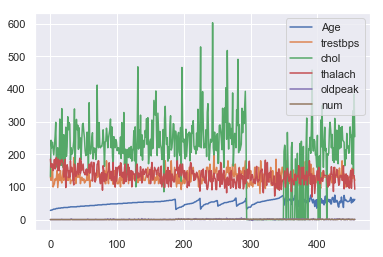

In [12]:
diseases.plot()

In [13]:
diseases = pd.get_dummies(diseases)

In [14]:
diseases.head()

,Age,trestbps,chol,thalach,oldpeak,num,Sex_female,Sex_male,cp_asymptomatic,cp_atypical angina,...,fbs_False,fbs_True,restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV,restecg_normal,restecg_showing probable or definite left ventricular hypertrophy by Estes criteria,exang_no,exang_yes,Place_Hungary,Place_Switzerland,Place_VA
0,28,130.0,132.0,185.0,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,1,0,0
1,29,120.0,243.0,160.0,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,29,140.0,220.0,170.0,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
3,30,170.0,237.0,170.0,0.0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,31,100.0,219.0,150.0,0.0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0


In [15]:
diseases.isnull().sum()

Age                                                                                                       0
trestbps                                                                                                  0
chol                                                                                                      0
thalach                                                                                                   0
oldpeak                                                                                                   0
num                                                                                                       0
Sex_female                                                                                                0
Sex_male                                                                                                  0
cp_asymptomatic                                                                                           0
cp_atypical angina          

In [16]:
X = diseases.drop('num', axis=1)
y = diseases.num

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
clf.score(X, y)

1.0

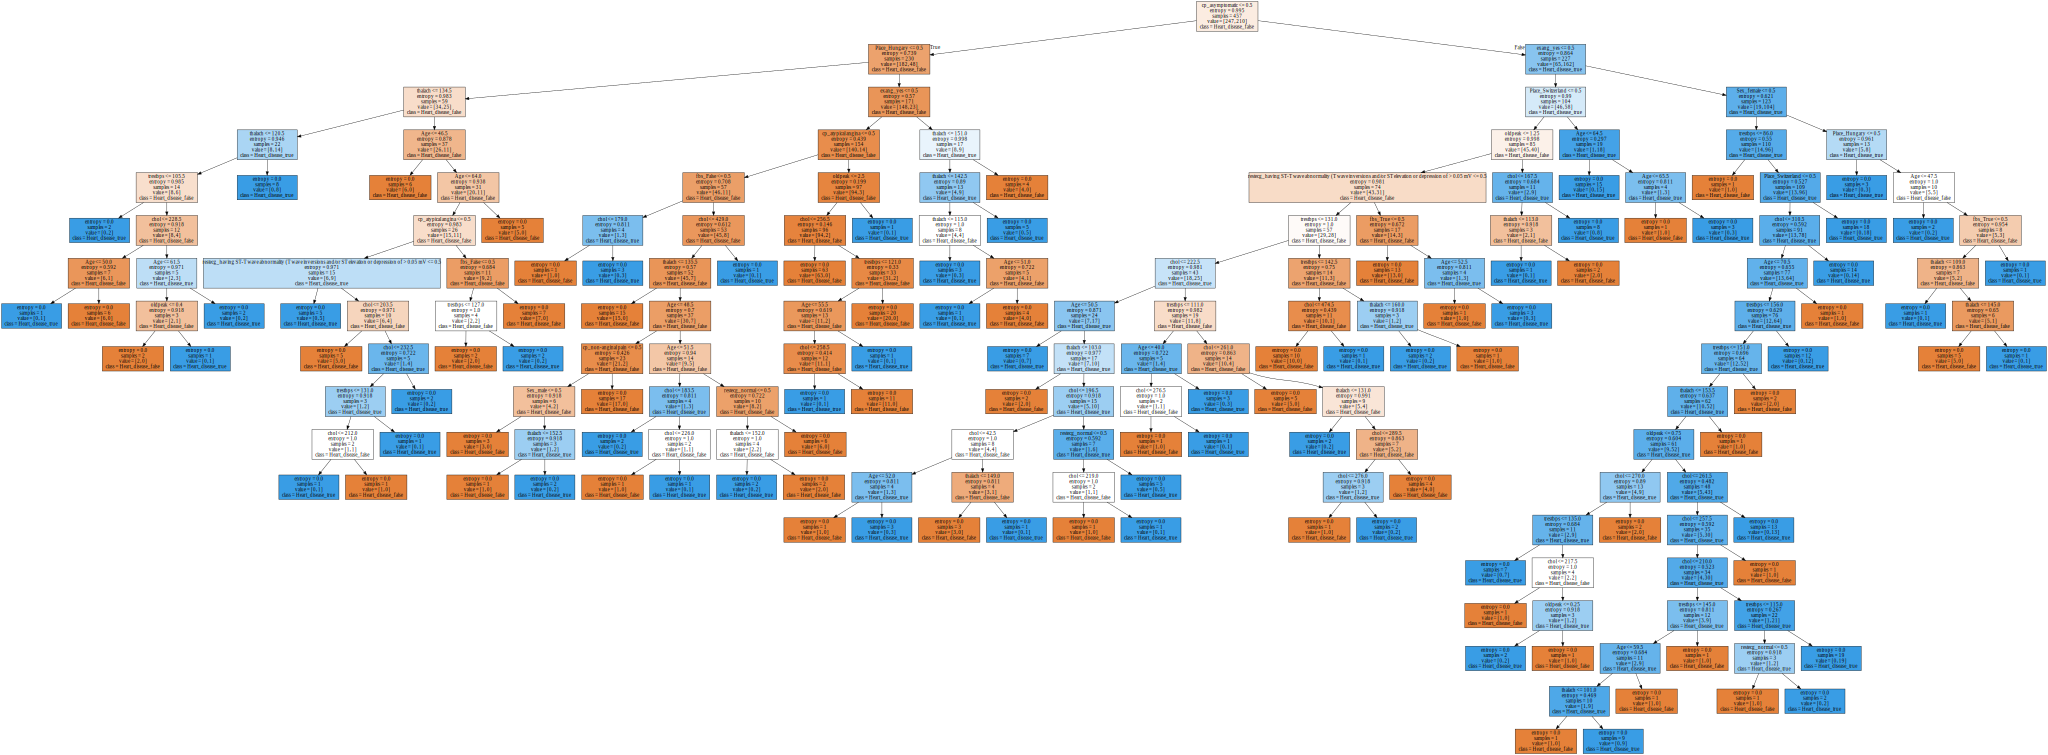

In [19]:
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None
   ,feature_names=list(X), class_names=['Heart_disease_false', 'Heart_disease_true'] 
   ,filled = True))

display(SVG(graph.pipe(format='svg')))
#graph.render('./res', view=True) - uncomment to save graph in '.pdf'

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
clf.score(X_train, y_train)

1.0

In [23]:
clf.score(X_test, y_test)

0.695364238410596

In [24]:
max_depth_values = range(1, 30)
classifier_score_data = pd.DataFrame()

In [25]:
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    classifier_score_data = classifier_score_data.append(pd.DataFrame({'test_score': [test_score],
                                                                       'train_score': [train_score],
                                                                       'max_dept': [max_dept]}))

In [26]:
classifier_score_data.head()

,test_score,train_score,max_dept
0,0.715232,0.771242,1
0,0.682119,0.797386,2
0,0.682119,0.797386,3
0,0.721854,0.843137,4
0,0.662252,0.875817,5


In [27]:
classifier_score_data.loc[(classifier_score_data.train_score == 1)].sort_values(by=['test_score'], ascending=False).head()

,test_score,train_score,max_dept
0,0.721854,1.0,22
0,0.715232,1.0,15
0,0.715232,1.0,18
0,0.715232,1.0,27
0,0.708609,1.0,20


In [28]:
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')

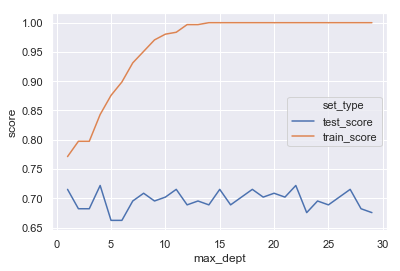

In [29]:
ax = sns.lineplot(x="max_dept", y="score",
                  hue="set_type", data=classifier_score_data)

In [30]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)

In [34]:
cross_val_scores.mean()

0.7157059756742464